# IRIS Classification Compact Code

Epoch 1/20
3/3 [==============================] - 0s 105ms/step - loss: 1.9429 - accuracy: 0.3438 - val_loss: 1.7841 - val_accuracy: 0.2500
Epoch 2/20
3/3 [==============================] - 0s 24ms/step - loss: 1.6213 - accuracy: 0.3438 - val_loss: 1.4907 - val_accuracy: 0.2500
Epoch 3/20
3/3 [==============================] - 0s 29ms/step - loss: 1.3777 - accuracy: 0.3438 - val_loss: 1.2756 - val_accuracy: 0.2500
Epoch 4/20
3/3 [==============================] - 0s 18ms/step - loss: 1.1835 - accuracy: 0.3438 - val_loss: 1.1345 - val_accuracy: 0.2500
Epoch 5/20
3/3 [==============================] - 0s 26ms/step - loss: 1.0432 - accuracy: 0.3438 - val_loss: 1.0292 - val_accuracy: 0.2500
Epoch 6/20
3/3 [==============================] - 0s 21ms/step - loss: 0.9402 - accuracy: 0.3542 - val_loss: 0.9549 - val_accuracy: 0.2917
Epoch 7/20
3/3 [==============================] - 0s 21ms/step - loss: 0.8534 - accuracy: 0.5208 - val_loss: 0.9045 - val_accuracy: 0.5417
Epoch 8/20
3/3 [==========

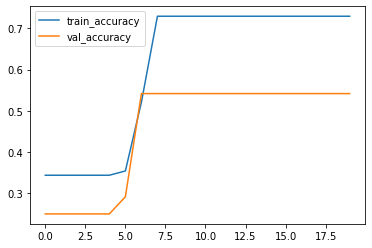

softmax output : 
[[0.06336368 0.30224004 0.63439626]
 [0.18391804 0.3417547  0.47432724]
 [0.94848555 0.03701082 0.01450356]
 [0.04828916 0.27369    0.67802083]
 [0.898056   0.06840739 0.03353667]]

prediction classes:  [2 2 0 2 0]


In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data_location = "https://s3.amazonaws.com/elephantscale-public/data/iris/keras/iris.csv"
data_location_local = keras.utils.get_file(fname=os.path.basename(data_location),
                                           origin=data_location)
iris = pd.read_csv(data_location_local)
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

input_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = iris [input_columns]
y = iris[['Species']]

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y.values) ## need y.values which is an array


# supply 'y1' (encoded labels)
x_train,x_test, y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=0) 

model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=64, activation=tf.nn.relu, input_shape=[x.shape[1]]),
            tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
            tf.keras.layers.Dense(units=3,  activation=tf.nn.softmax)
            ])

model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='adam',
                 metrics=['accuracy'])

history = model.fit(
              x_train, y_train,
              epochs=20, validation_split = 0.2, verbose=1)

print (model.evaluate(x_test, y_test))

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

predictions = model.predict(x_test[:5])
print ('softmax output : ')
print(predictions)
print ()
predictions_classes = np.argmax(predictions, axis=-1)
print ('prediction classes: ', predictions_classes)